In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [2]:
data = pd.read_csv('https://aaa-pgdmlai.s3.amazonaws.com/logistic_desirable_prob.csv')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(11351, 15)
['household_key', 'zip5', 'length_of_residence', 'income', 'children', 'mosaic_household', 'mosaic_global_household', 'kcl_b_ind_mosaicsgrouping', 'new_mover_flag', 'breakdown_city', 'motorcycle_indicator', 'prob1_code_description', 'sc_vehicle_manufacturer_name', 'sc_vehicle_model_name', 'desirable_customer']


In [3]:
data.head()

,household_key,zip5,length_of_residence,income,children,mosaic_household,mosaic_global_household,kcl_b_ind_mosaicsgrouping,new_mover_flag,breakdown_city,motorcycle_indicator,prob1_code_description,sc_vehicle_manufacturer_name,sc_vehicle_model_name,desirable_customer
0,875,2920,0,0,No,Digital Dependents,Hard Working Blue Collar,Singles and Starters,N,Unknwon,N,Unknown,Unknown,Unknown,1
1,875,2921,0,0,No,Couples with Clout,Bourgeois Prosperity,Power Elite,N,Attleboro,N,Tow,CHRYSLER,TOWN & COUNTRY,1
2,875,2921,0,0,No,Couples with Clout,Bourgeois Prosperity,Power Elite,N,Charlestown,N,Tow,NISSAN,MAXIMA,0
3,875,2921,0,0,No,Couples with Clout,Bourgeois Prosperity,Power Elite,N,Cranston,Y,Tow,TOYOTA,TOWN & COUNTRY,0
4,875,2921,0,0,No,Couples with Clout,Bourgeois Prosperity,Power Elite,Y,North Attleboro,N,Tow,TOYOTA,COROLLA,1


### Data exploration

In [4]:
data['desirable_customer'].value_counts()

1    10020
0     1331
Name: desirable_customer, dtype: int64

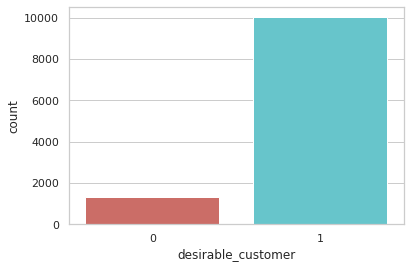

<Figure size 432x288 with 0 Axes>

In [5]:
sns.countplot(x='desirable_customer',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

Let's get a sense of the numbers across the two classes

In [6]:
data.groupby('desirable_customer').mean()

,household_key,zip5,length_of_residence
desirable_customer,,,
0,1.529985e+07,2923.025545,9.339594
1,1.512195e+07,2951.917665,6.990020


We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [7]:
data.groupby('income').mean()

,household_key,zip5,length_of_residence,desirable_customer
income,,,,
0,1.646664e+07,3024.277030,0.030394,0.931323
"10-19,999",1.396907e+07,2894.938667,9.733333,0.856000
"100-149,999",1.402151e+07,2903.951768,12.261736,0.865595
"150 - 174,999",2.001262e+07,2904.905303,13.484848,0.871212
"175 - 199,999",1.450521e+07,2904.211957,11.483696,0.866848
"20-29,999",1.752893e+07,2919.461207,11.586207,0.844828
"200 - 249,999",1.748836e+07,2865.954167,11.333333,0.850000
250K+,1.865978e+07,2972.811715,12.008368,0.882845
"30-39,999",1.198132e+07,2900.254019,11.215434,0.832797


In [8]:
data.groupby('sc_vehicle_manufacturer_name').mean()

,household_key,zip5,length_of_residence,desirable_customer
sc_vehicle_manufacturer_name,,,,
ACURA,1.576156e+07,2944.157895,6.842105,0.859649
APRILIA,3.752326e+07,2910.000000,9.000000,0.000000
AUDI,1.974131e+07,2880.968750,6.937500,0.875000
AUSTIN HEALEY,6.232293e+07,2919.000000,0.000000,0.000000
BICYCLE,9.163999e+06,2901.500000,1.500000,1.000000
...,...,...,...,...
Unknown,1.491829e+07,2995.771921,5.601581,0.999521
VOLKSWAGEN,1.444645e+07,2945.570850,8.716599,0.704453
VOLKSWAGON,5.726121e+06,2920.000000,15.000000,1.000000


In [9]:
data.groupby('motorcycle_indicator').mean()

,household_key,zip5,length_of_residence,desirable_customer
motorcycle_indicator,,,,
N,1.489012e+07,2960.078469,6.810166,0.948715
Y,1.599503e+07,2909.582049,8.801233,0.660247


Visualizations

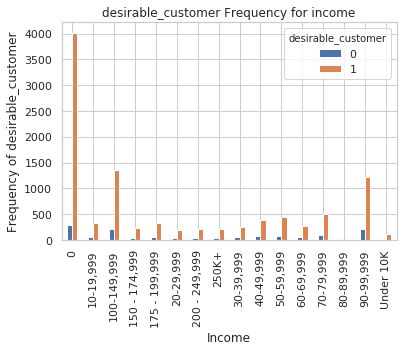

In [10]:
%matplotlib inline
pd.crosstab(data.income,data.desirable_customer).plot(kind='bar')
plt.title('desirable_customer Frequency for income')
plt.xlabel('Income')
plt.ylabel('Frequency of desirable_customer')
plt.savefig('desirable_customer_fre_income')

The frequency of purchase of the product depends a great deal on the income. Thus, the income can be a good predictor of the outcome variable.

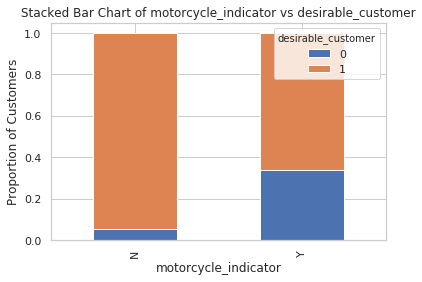

In [11]:
table=pd.crosstab(data.motorcycle_indicator,data.desirable_customer)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of motorcycle_indicator vs desirable_customer')
plt.xlabel('motorcycle_indicator')
plt.ylabel('Proportion of Customers')
plt.savefig('motorcycle_indicator_vs_desirable_customer')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

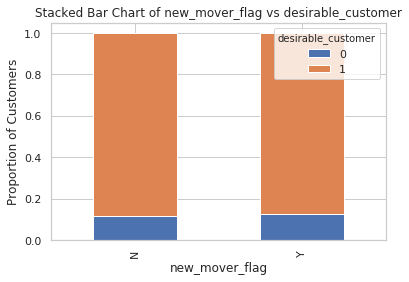

In [12]:
table=pd.crosstab(data.new_mover_flag,data.desirable_customer)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of new_mover_flag vs desirable_customer')
plt.xlabel('new_mover_flag')
plt.ylabel('Proportion of Customers')
plt.savefig('new_mover_flag_vs_desirable_customer')

new_mover_flag seems a good predictor of the outcome variable.

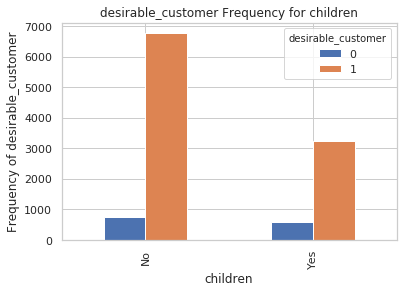

In [13]:
pd.crosstab(data.children,data.desirable_customer).plot(kind='bar')
plt.title('desirable_customer Frequency for children')
plt.xlabel('children')
plt.ylabel('Frequency of desirable_customer')
plt.savefig('pur_children_bar')

Month might be a good predictor of the outcome variable

The most of the customers of the bank in this dataset are in the age range of 30-40.

### Create dummy variables

In [0]:
cat_vars=['length_of_residence','income', 'children', 'mosaic_household', 'mosaic_global_household', 'kcl_b_ind_mosaicsgrouping', 'new_mover_flag', 'breakdown_city','motorcycle_indicator',  'prob1_code_description','sc_vehicle_manufacturer_name', 'sc_vehicle_model_name']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [0]:
cat_vars=['length_of_residence','income', 'children', 'mosaic_household', 'mosaic_global_household', 'kcl_b_ind_mosaicsgrouping', 'new_mover_flag', 'breakdown_city','motorcycle_indicator',  'prob1_code_description','sc_vehicle_manufacturer_name', 'sc_vehicle_model_name']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [24]:
data_final=data[to_keep]
data_final.columns.values
pp = data_final.columns.values
print(pp)

['household_key' 'zip5' 'desirable_customer' ...
 'sc_vehicle_model_name_Z3' 'sc_vehicle_model_name_Z4'
 'sc_vehicle_model_name_ZEPHYR']


In [25]:

X = data_final.loc[:, data_final.columns != 'desirable_customer']
y = data_final.loc[:, data_final.columns == 'desirable_customer']

       desirable_customer
0                       1
1                       1
2                       0
3                       0
4                       1
...                   ...
11346                   1
11347                   1
11348                   1
11349                   0
11350                   0

[11351 rows x 1 columns]


In [19]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['desirable_customer'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['desirable_customer']==0]))
print("Number of subscription",len(os_data_y[os_data_y['desirable_customer']==1]))
print("Proportion of desirable data in oversampled data is ",len(os_data_y[os_data_y['desirable_customer']==0])/len(os_data_X))
print("Proportion of desirable data in oversampled data is ",len(os_data_y[os_data_y['desirable_customer']==1])/len(os_data_X))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  14016
Number of no subscription in oversampled data 7008
Number of subscription 7008
Proportion of desirable data in oversampled data is  0.5
Proportion of desirable data in oversampled data is  0.5


In [0]:
data_final_vars=data_final.columns.values.tolist()
y=['desirable_customer']
X=[i for i in data_final_vars if i not in y]

In [0]:
# from sklearn import datasets
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression(solver='lbfgs')

# rfe = RFE(logreg, 20)
# rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
# print(rfe.support_)
# print(rfe.ranking_)

In [0]:
# data_final_vars=data_final.columns.values.tolist()
# y=['ins_client_flag_Y']
# X=[i for i in data_final_vars if i not in y]

### Feature Selection

In [21]:
# from sklearn import datasets
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression()

# rfe = RFE(logreg, 18)
# rfe = rfe.fit(data_final[X], data_final[y] )
# print(rfe.support_)
# print(rfe.ranking_)
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
#################### OUTPUT ############
# 'zip5',
# 'length_of_residence',
# 'income_100-149,999',
# 'children_No',
# 'mosaic_household_AginginPlace',
# 'mosaic_global_household_BourgeoisProsperity',
# 'mosaic_global_household_ComfortableRetirement',
# 'kcl_b_ind_mosaicsgrouping_AutumnYears',
# 'kcl_b_ind_mosaicsgrouping_BoomingwithConfidence',
# 'new_mover_flag_N',
# 'new_mover_flag_Y',
# 'motorcycle_indicator_N',
# 'motorcycle_indicator_Y',
# 'sc_vehicle_manufacturer_name_TOYOTA',


[ True  True  True ... False False False]
[  1   1   1 ... 673 636 726]


In [0]:
cols=['zip5',
'income_100-149,999',
'children_No',
'mosaic_household_Aging in Place',
'mosaic_global_household_Bourgeois Prosperity',
'mosaic_global_household_Comfortable Retirement',
'kcl_b_ind_mosaicsgrouping_Autumn Years',
'kcl_b_ind_mosaicsgrouping_Booming with Confidence',
'new_mover_flag_N',
'new_mover_flag_Y',
'motorcycle_indicator_N',
'motorcycle_indicator_Y',
'sc_vehicle_manufacturer_name_TOYOTA'
] 
X=data_final[cols]
y=data_final['desirable_customer']

### Implementing the model

In [29]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.297210
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     desirable_customer   No. Observations:                11351
Model:                          Logit   Df Residuals:                    11339
Method:                           MLE   Df Model:                           11
Date:                Tue, 17 Dec 2019   Pseudo R-squ.:                  0.1777
Time:                        19:19:31   Log-Likelihood:                -3373.6
converged:                       True   LL-Null:                       -4102.6
Covariance Type:            nonrobust   LLR p-value:                3.955e-306
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
zip5                          

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

Optimization based on removing higer P values

In [51]:
cols=[
'children_No',
'sc_vehicle_manufacturer_name_TOYOTA'
] 
X=data_final[cols]
y=data_final['desirable_customer']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.448833
         Iterations 6
                                  Results: Logit
Model:                   Logit                   Pseudo R-squared:      -0.242    
Dependent Variable:      desirable_customer      AIC:                   10193.4143
Date:                    2019-12-17 19:25        BIC:                   10208.0884
No. Observations:        11351                   Log-Likelihood:        -5094.7   
Df Model:                1                       LL-Null:               -4102.6   
Df Residuals:            11349                   LLR p-value:           1.0000    
Converged:               1.0000                  Scale:                 1.0000    
No. Iterations:          6.0000                                                   
----------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-------------------

### Logistic Regression Model Fitting

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting the test set results and caculating the accuracy

In [0]:
y_pred = logreg.predict(X_test)

In [54]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


### Cross Validation

In [55]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver="lbfgs")
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.882


### Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[   0  394]
 [   0 3012]]


The result is telling us that we have 2505 correct predictions and 651 incorrect predictions.

#### Accuracy

In [57]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       394
           1       0.88      1.00      0.94      3012

    accuracy                           0.88      3406
   macro avg       0.44      0.50      0.47      3406
weighted avg       0.78      0.88      0.83      3406



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Interpretation: 

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer's preferred term deposit were promoted.

### ROC Curvefrom sklearn import metrics
from ggplot import *

prob = clf1.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame(dict(fpr=fpr, sensitivity=sensitivity))
ggplot(df, aes(x='fpr', y='sensitivity')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

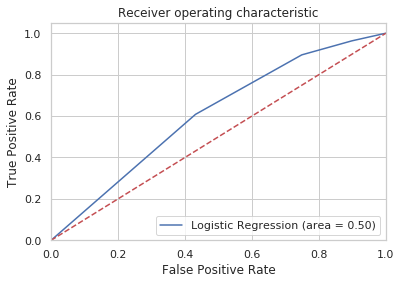

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()